In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_parquet("/project_ghent/raman/netflow_datasets/nfunswnb15v2/NF-UNSW-NB15-V2.parquet")

In [4]:
training_set = data.sample(frac=0.3, replace=False,random_state=42)
# 1%train, 99% test
testing_set = data.drop(index=training_set.index)

In [5]:
training_set.Attack.value_counts()

Attack
Benign            573514
Exploits            8929
Fuzzers             6196
Reconnaissance      3356
Generic             1839
DoS                 1232
Shellcode            448
Backdoor             241
Analysis             225
Worms                 44
Name: count, dtype: int64

In [6]:
testing_set=testing_set[testing_set.Attack!="Worms"]

In [7]:
training_set=training_set[training_set.Attack!="Worms"]
attacks=training_set.Attack.unique()
attacks

array(['Benign', 'Fuzzers', 'Reconnaissance', 'Exploits', 'DoS',
       'Generic', 'Analysis', 'Shellcode', 'Backdoor'], dtype=object)

In [8]:
grouped = training_set.groupby(training_set.Attack)
dfs={cat:grouped.get_group(cat) for cat in attacks[1:]}
dfs[attacks[0]]=grouped.get_group(attacks[0]) #don't subsample normal attacks
#dfs key=attack_cat, value is dataframe 

In [9]:
for atk_type in attacks[1:]:
    normals_to_sample = dfs[atk_type].shape[0]
#     print(normals_to_sample)
    normals_sample = dfs['Benign'].sample(normals_to_sample)
#     dfs['Normal'] = dfs['Normal'].drop(index=normals_sample.index)#don't resample
    dfs[atk_type] = pd.concat(objs=[dfs[atk_type], normals_sample])
    print(dfs[atk_type].shape[0], normals_sample.shape[0], dfs['Benign'].shape[0])

12392 6196 573514
6712 3356 573514
17858 8929 573514
2464 1232 573514
3678 1839 573514
450 225 573514
896 448 573514
482 241 573514


In [10]:
testing_dfs = {}
grouped = testing_set.groupby(testing_set.Attack)
testing_dfs={cat:grouped.get_group(cat) for cat in attacks[1:]}
testing_dfs[attacks[0]]=grouped.get_group(attacks[0]) #don't subsample normal attacks
#testing_dfs key=attack_cat, value is dataframe 

In [11]:
for atk_type in attacks[1:]:
    normals_to_sample = testing_dfs[atk_type].shape[0] 
    normals_sample = testing_dfs['Benign'].sample(normals_to_sample)
#     testing_dfs['Normal'] = testing_dfs['Normal'].drop(index=normals_sample.index)#don't resample
    testing_dfs[atk_type] = pd.concat(objs=[testing_dfs[atk_type], normals_sample])
    print(testing_dfs[atk_type].shape[0], normals_sample.shape[0], testing_dfs['Benign'].shape[0])

28898 14449 1338152
15630 7815 1338152
41952 20976 1338152
5880 2940 1338152
8306 4153 1338152
1090 545 1338152
1958 979 1338152
1184 592 1338152


In [12]:
print(f"TRAINING SETS")
for k,v in dfs.items():
    v.drop(columns=['Attack'], inplace=True)   
    print(k, v.shape)
    print(v['Label'].value_counts())

TRAINING SETS
Fuzzers (12392, 42)
Label
1    6196
0    6196
Name: count, dtype: int64
Reconnaissance (6712, 42)
Label
1    3356
0    3356
Name: count, dtype: int64
Exploits (17858, 42)
Label
1    8929
0    8929
Name: count, dtype: int64
DoS (2464, 42)
Label
1    1232
0    1232
Name: count, dtype: int64
Generic (3678, 42)
Label
1    1839
0    1839
Name: count, dtype: int64
Analysis (450, 42)
Label
1    225
0    225
Name: count, dtype: int64
Shellcode (896, 42)
Label
1    448
0    448
Name: count, dtype: int64
Backdoor (482, 42)
Label
1    241
0    241
Name: count, dtype: int64
Benign (573514, 42)
Label
0    573514
Name: count, dtype: int64


/tmp/ipykernel_161/520402162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v.drop(columns=['Attack'], inplace=True)


In [13]:
print("TESTING SETS")
for k,v in testing_dfs.items():
    v.drop(columns=['Attack'], inplace=True)   
    print(k, v.shape)
    print(v['Label'].value_counts())

TESTING SETS
Fuzzers (28898, 42)
Label
1    14449
0    14449
Name: count, dtype: int64
Reconnaissance (15630, 42)
Label
1    7815
0    7815
Name: count, dtype: int64
Exploits (41952, 42)
Label
1    20976
0    20976
Name: count, dtype: int64
DoS (5880, 42)
Label
1    2940
0    2940
Name: count, dtype: int64
Generic (8306, 42)
Label
1    4153
0    4153
Name: count, dtype: int64
Analysis (1090, 42)
Label
1    545
0    545
Name: count, dtype: int64
Shellcode (1958, 42)
Label
1    979
0    979
Name: count, dtype: int64
Backdoor (1184, 42)
Label
1    592
0    592
Name: count, dtype: int64
Benign (1338152, 42)
Label
0    1338152
Name: count, dtype: int64


/tmp/ipykernel_161/4161559584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v.drop(columns=['Attack'], inplace=True)


In [14]:
training_dfs=dfs

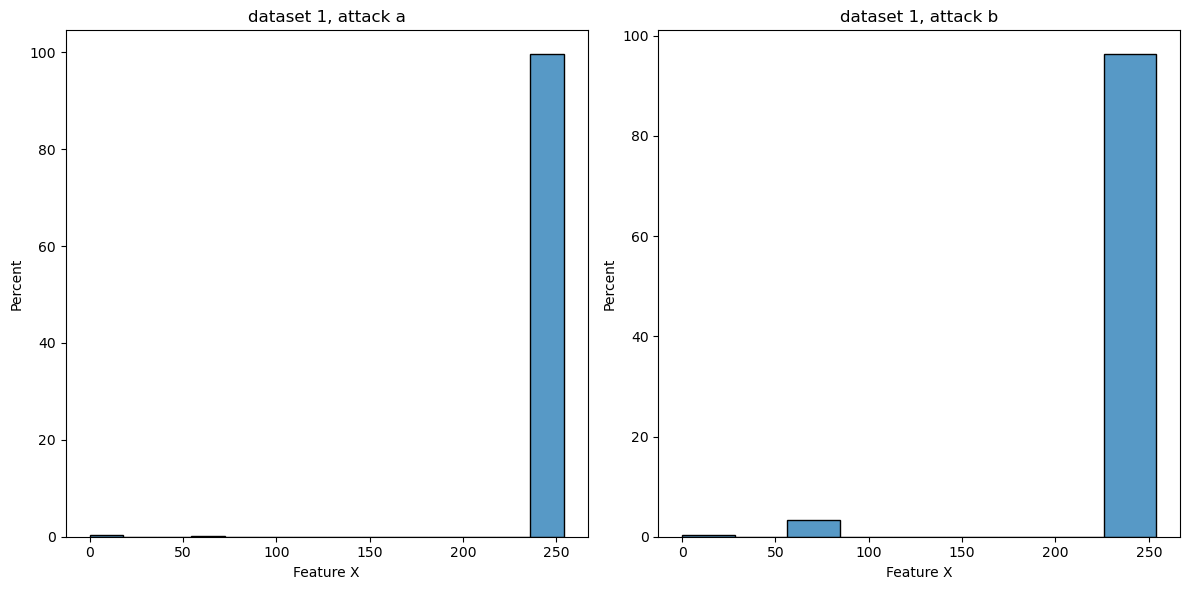

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for "Fuzzers" attack class
sns.histplot(dfs["Fuzzers"][dfs["Fuzzers"].Label==1].MIN_TTL, stat="percent", ax=axs[0])
axs[0].set_title("dataset 1, attack a")
axs[0].set_xlabel("Feature X")  # Set x-axis label for the first plot

# Plot histogram for "Backdoor" attack class
sns.histplot(dfs["Backdoor"][dfs["Backdoor"].Label==1].MIN_TTL, stat="percent", ax=axs[1])
axs[1].set_title("dataset 1, attack b")
axs[1].set_xlabel("Feature X")  # Set x-axis label for the first plot


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

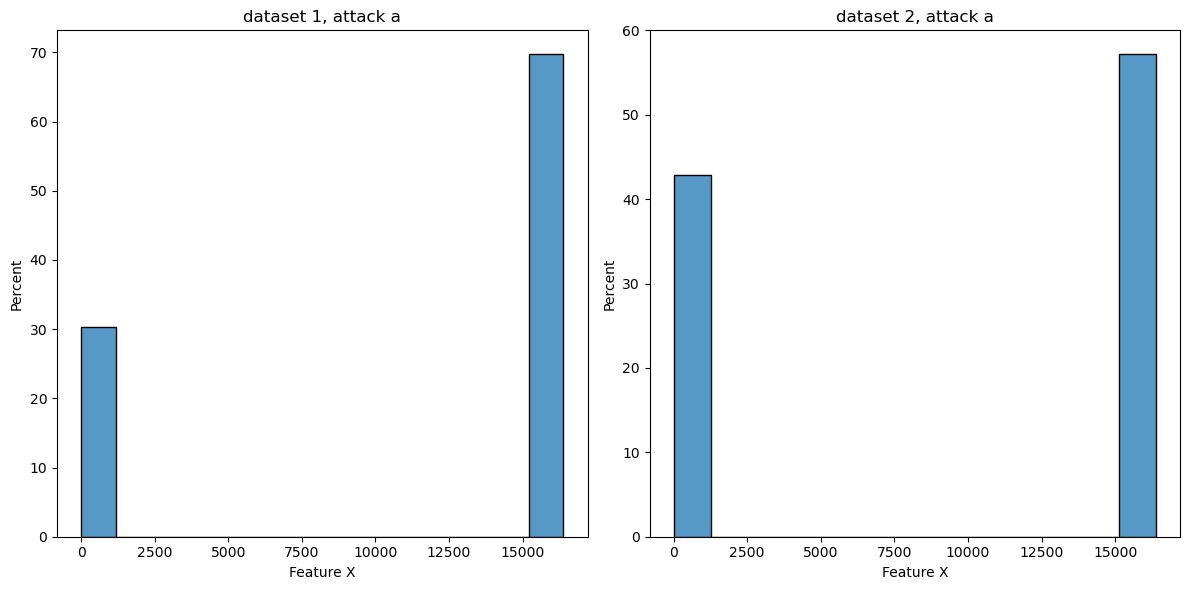

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for "Fuzzers" attack class
sns.histplot(dfs["Fuzzers"][dfs["Fuzzers"].Label==1].TCP_WIN_MAX_IN, stat="percent", ax=axs[0])
axs[0].set_title("dataset 1, attack a")
axs[0].set_xlabel("Feature X")  # Set x-axis label for the first plot

# Plot histogram for "Backdoor" attack class
sns.histplot(dfs["Reconnaissance"][dfs["Reconnaissance"].Label==1].TCP_WIN_MAX_IN, stat="percent", ax=axs[1])
axs[1].set_title("dataset 2, attack a")
axs[1].set_xlabel("Feature X")  # Set x-axis label for the first plot


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

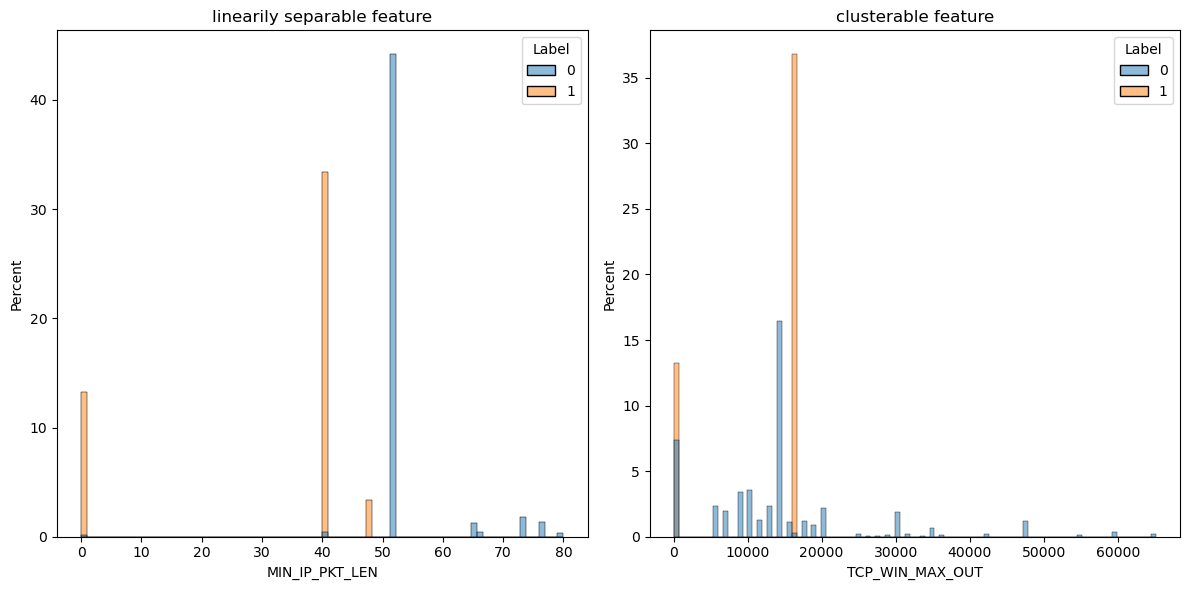

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for "Fuzzers" attack class
sns.histplot(data=dfs["Fuzzers"],x="MIN_IP_PKT_LEN", stat="percent",hue="Label",ax=axs[0])
axs[0].set_title("linearily separable feature")

# Plot histogram for "Backdoor" attack class
sns.histplot(data=dfs["Fuzzers"],x="TCP_WIN_MAX_OUT", stat="percent",hue="Label",ax=axs[1])
axs[1].set_title("clusterable feature")

# Set common y-axis label
# fig.text(0.5, 0.04, "MIN_TTL", ha='center')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()